<a href="https://colab.research.google.com/github/viditk03/Internmeets-Internship-Project-2/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_path = 'insurance.csv'
data = pd.read_csv('insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

In [ ]:
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

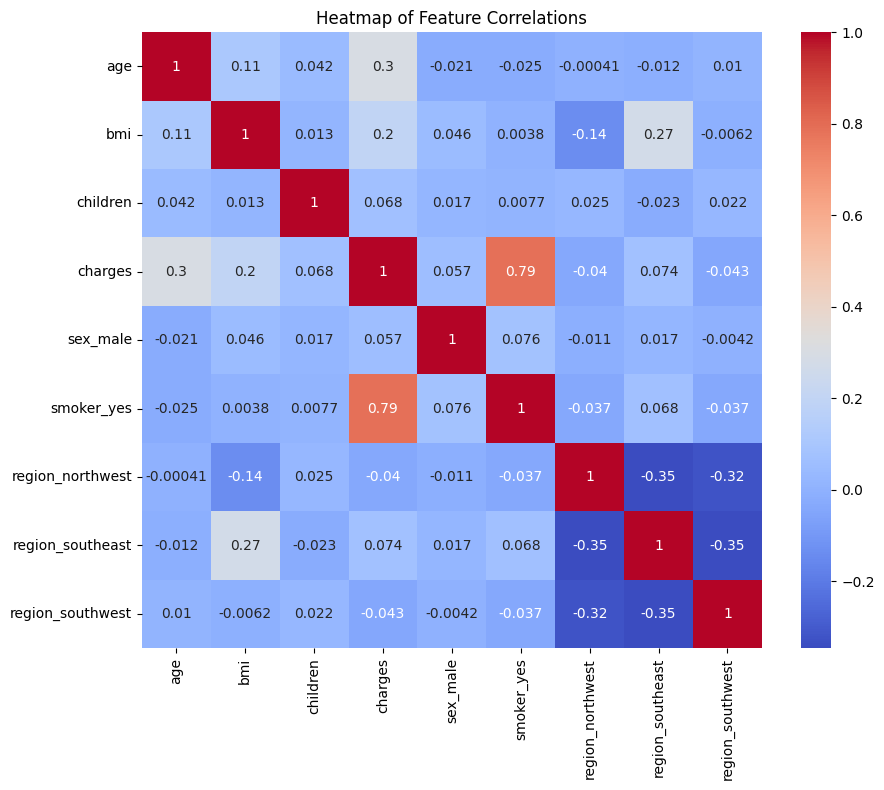

In [ ]:
# Plotting Heatmap to see dependency
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

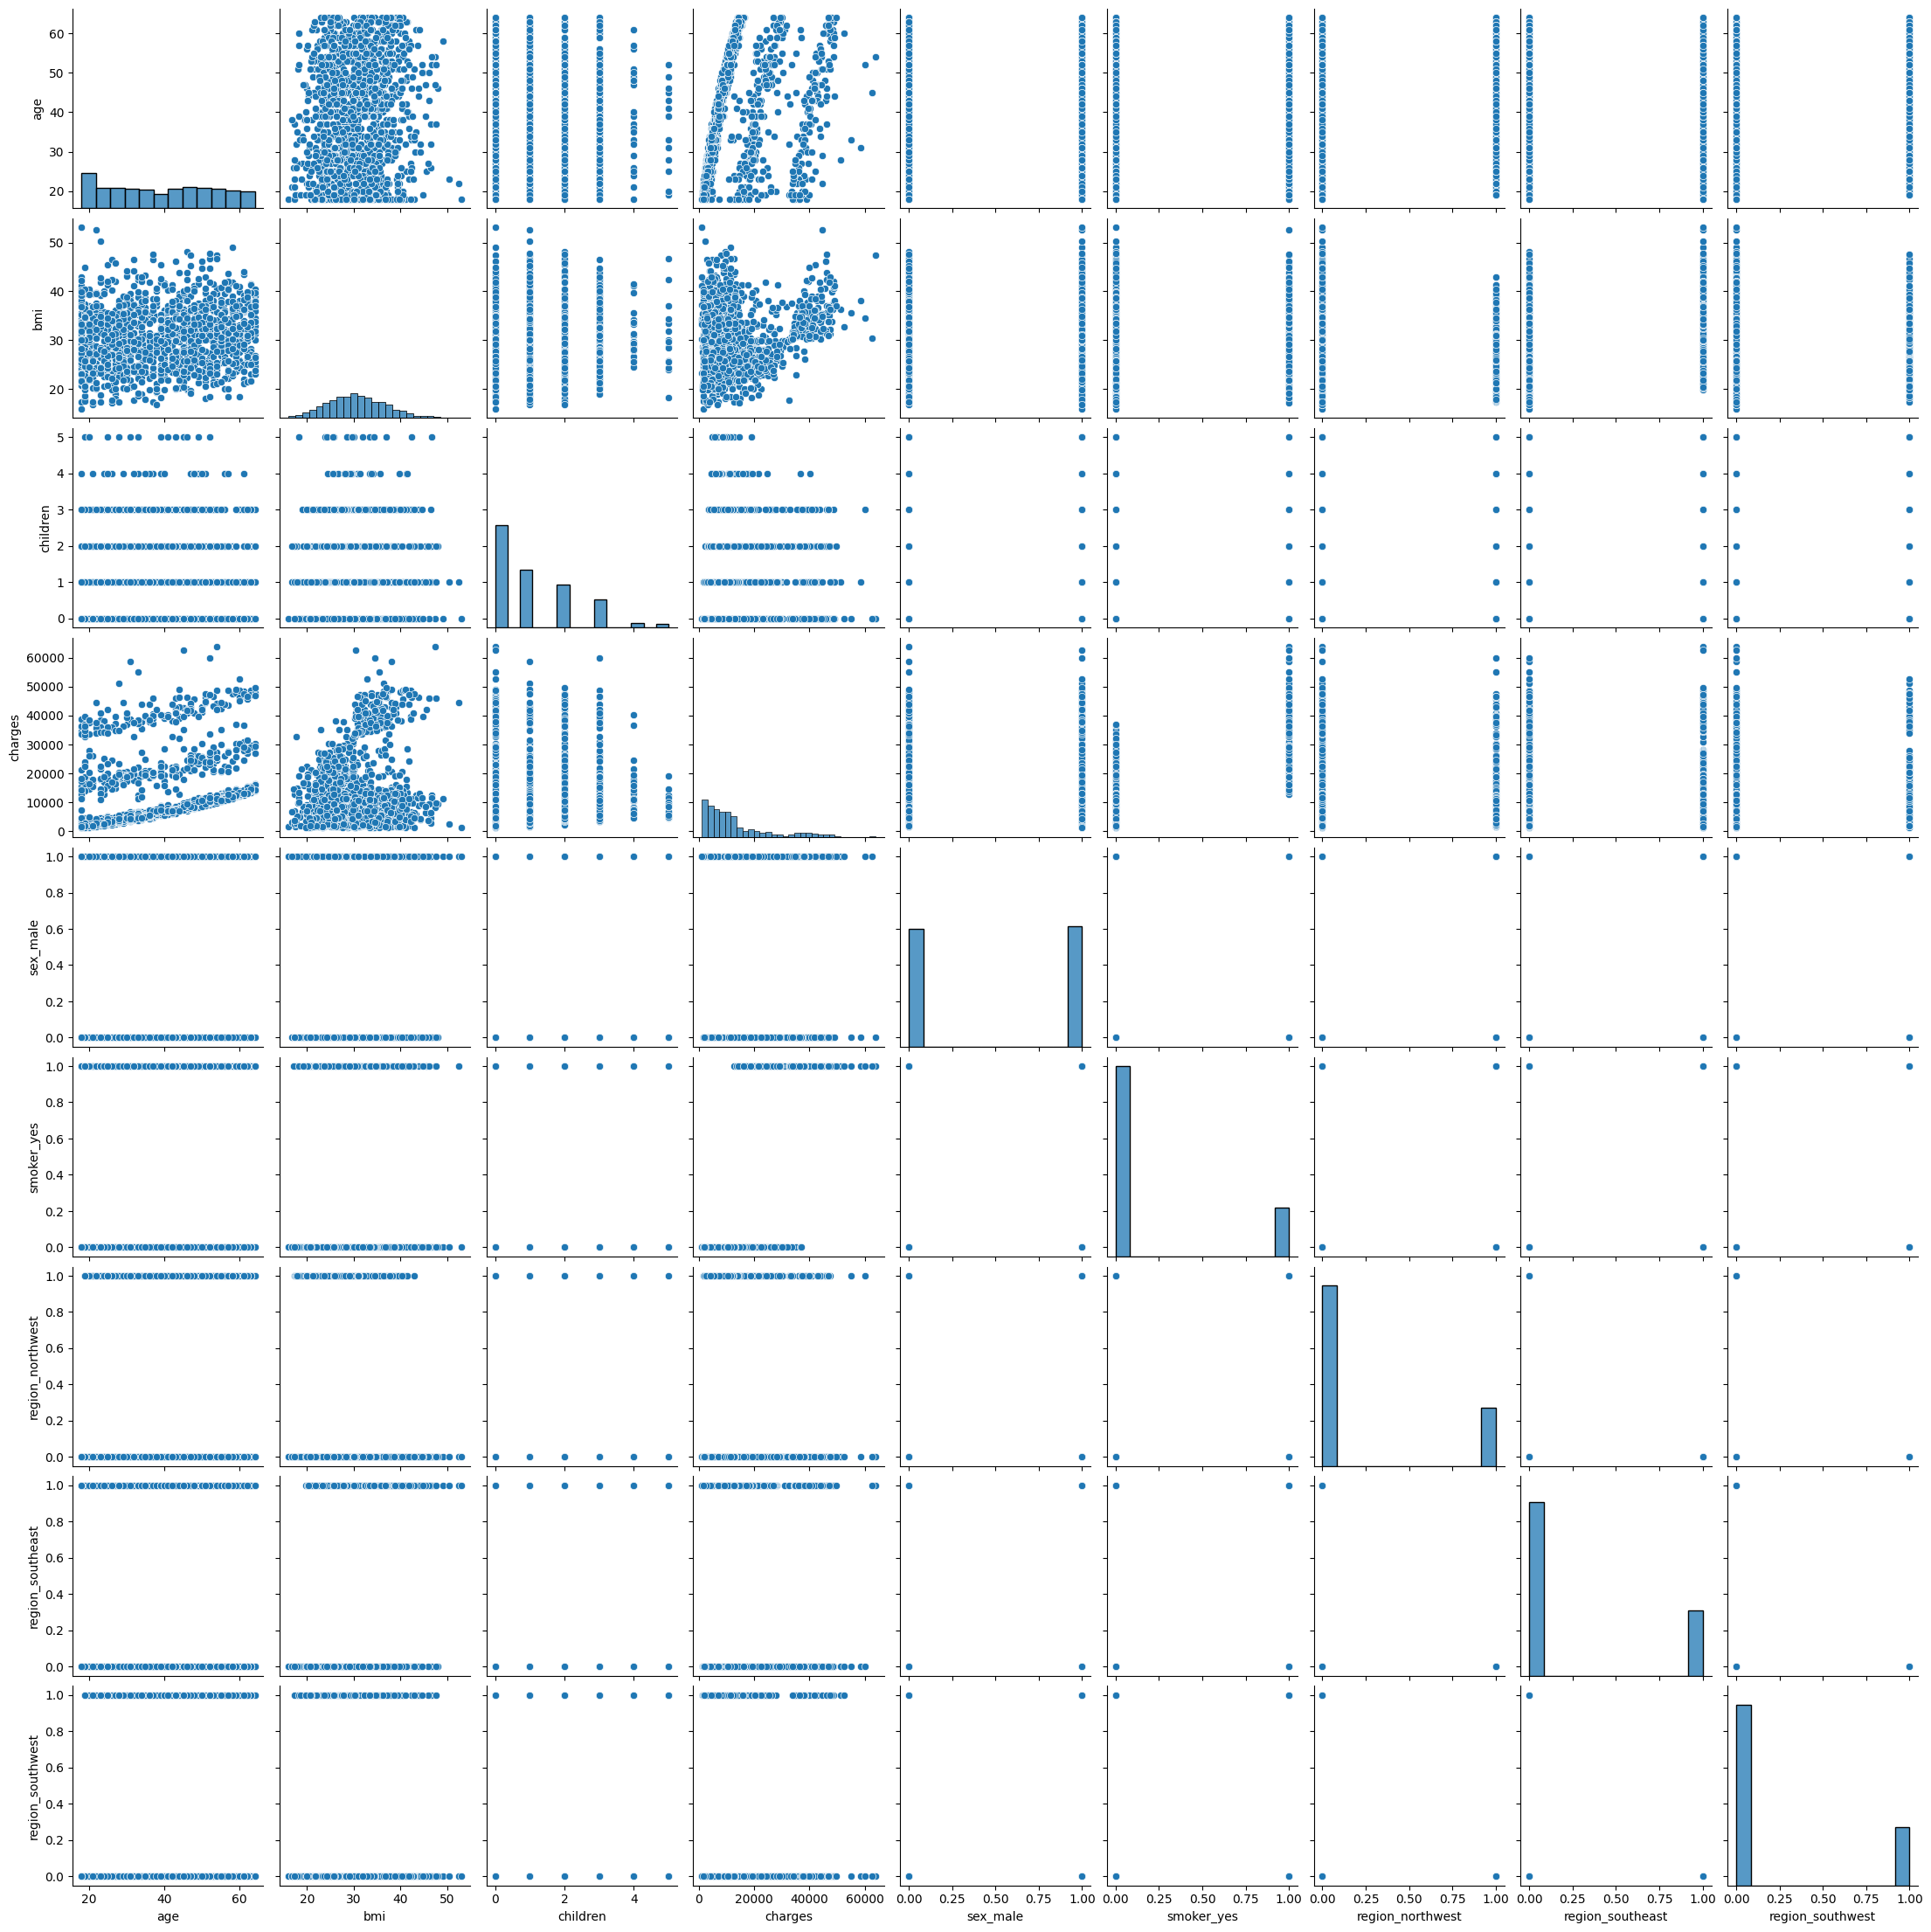

In [ ]:
# Data Visualization (Feature vs Feature)
sns.pairplot(data_encoded)
plt.show()

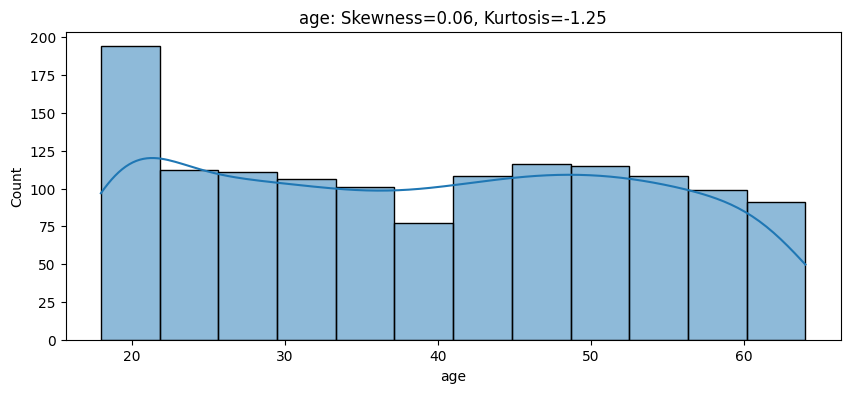

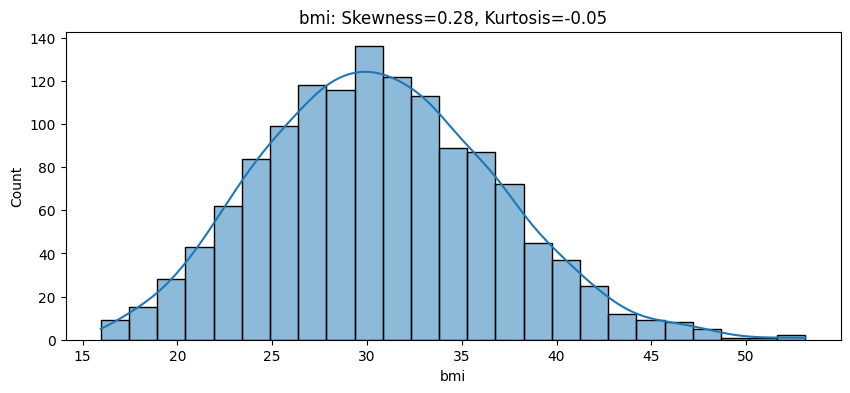

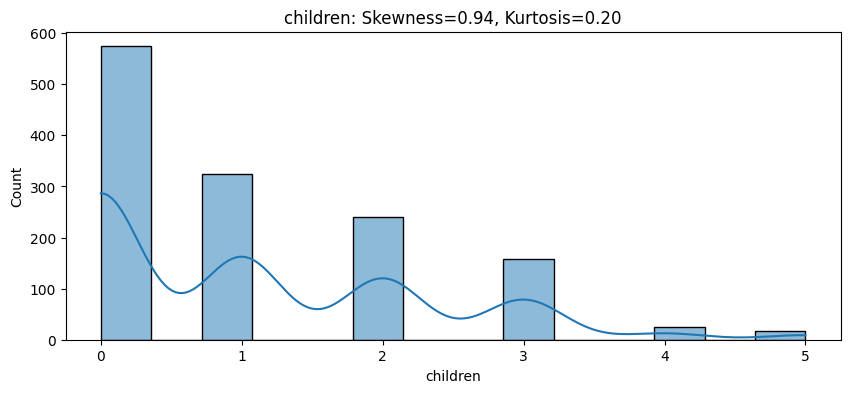

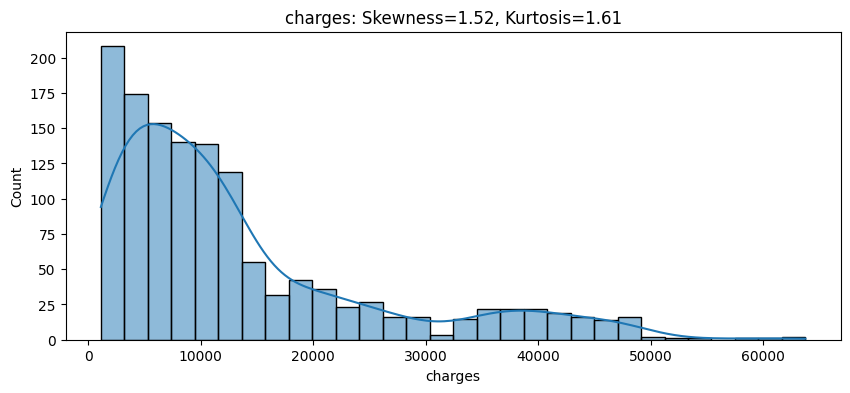

In [ ]:
# Plotting Skew and Kurtosis
for column in data_encoded.columns:
    if np.issubdtype(data_encoded[column].dtype, np.number):
        plt.figure(figsize=(10, 4))
        sns.histplot(data_encoded[column], kde=True)
        plt.title(f'{column}: Skewness={data_encoded[column].skew():.2f}, Kurtosis={data_encoded[column].kurt():.2f}')
        plt.show()

In [ ]:
# Data Preparation
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Prediction using different models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Ridge Regressor': Ridge(),
    'Random Forest Regressor': RandomForestRegressor()
}

In [ ]:
# Hyperparameter tuning
param_grids = {
    'Linear Regression': {},
    'SVR': {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]},
    'Ridge Regressor': {'alpha': [0.1, 1, 10]},
    'Random Forest Regressor': {'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt', 'log2']}
}

best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f'{name} best params: {grid_search.best_params_}')


Linear Regression best params: {}
SVR best params: {'C': 10, 'epsilon': 0.5}
Ridge Regressor best params: {'alpha': 10}
Random Forest Regressor best params: {'max_features': 'log2', 'n_estimators': 200}


In [ ]:
# Comparing performance
performance = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    performance[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }
    print(f'{name}: MSE={performance[name]["MSE"]:.2f}, R2={performance[name]["R2"]:.2f}')

Linear Regression: MSE=33596915.85, R2=0.78
SVR: MSE=160399951.23, R2=-0.03
Ridge Regressor: MSE=33685862.86, R2=0.78
Random Forest Regressor: MSE=20641379.13, R2=0.87


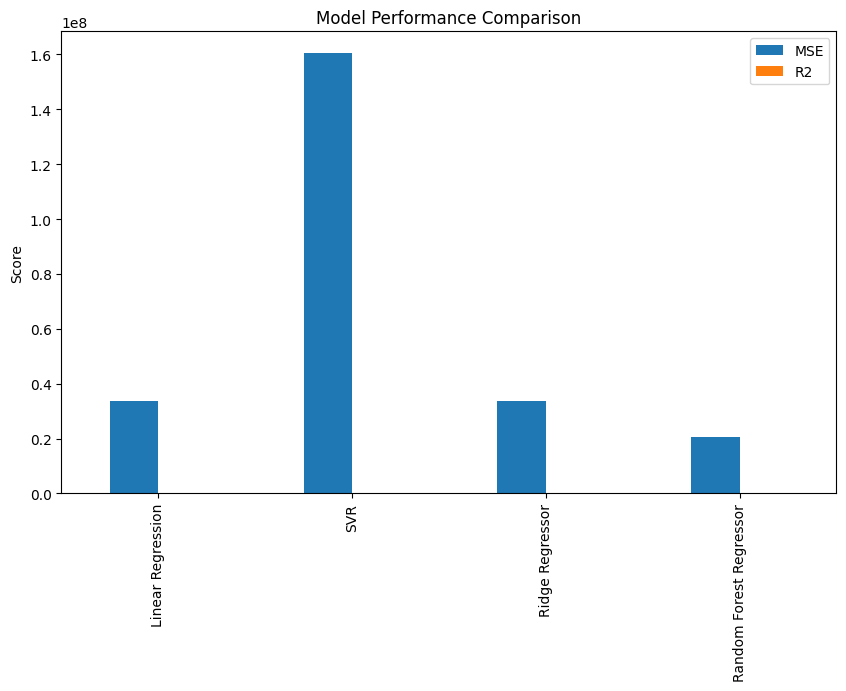

In [ ]:
# Plotting graph for all models to compare performance
performance_df = pd.DataFrame(performance).T
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Convert categorical values to numerical
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)


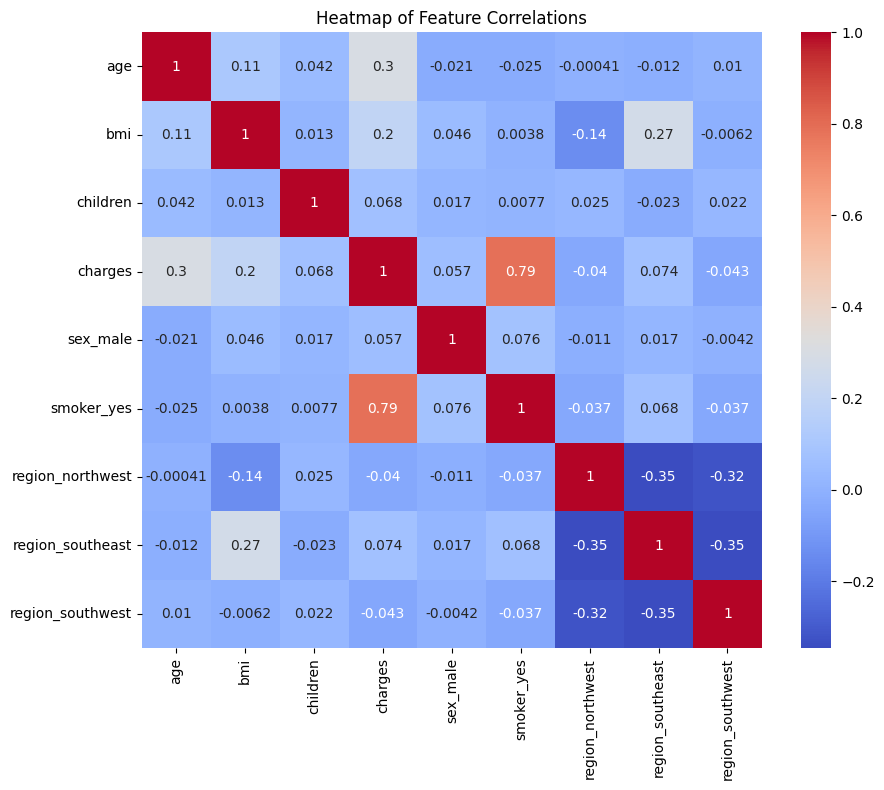

In [ ]:
# Plotting Heatmap to see dependency
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

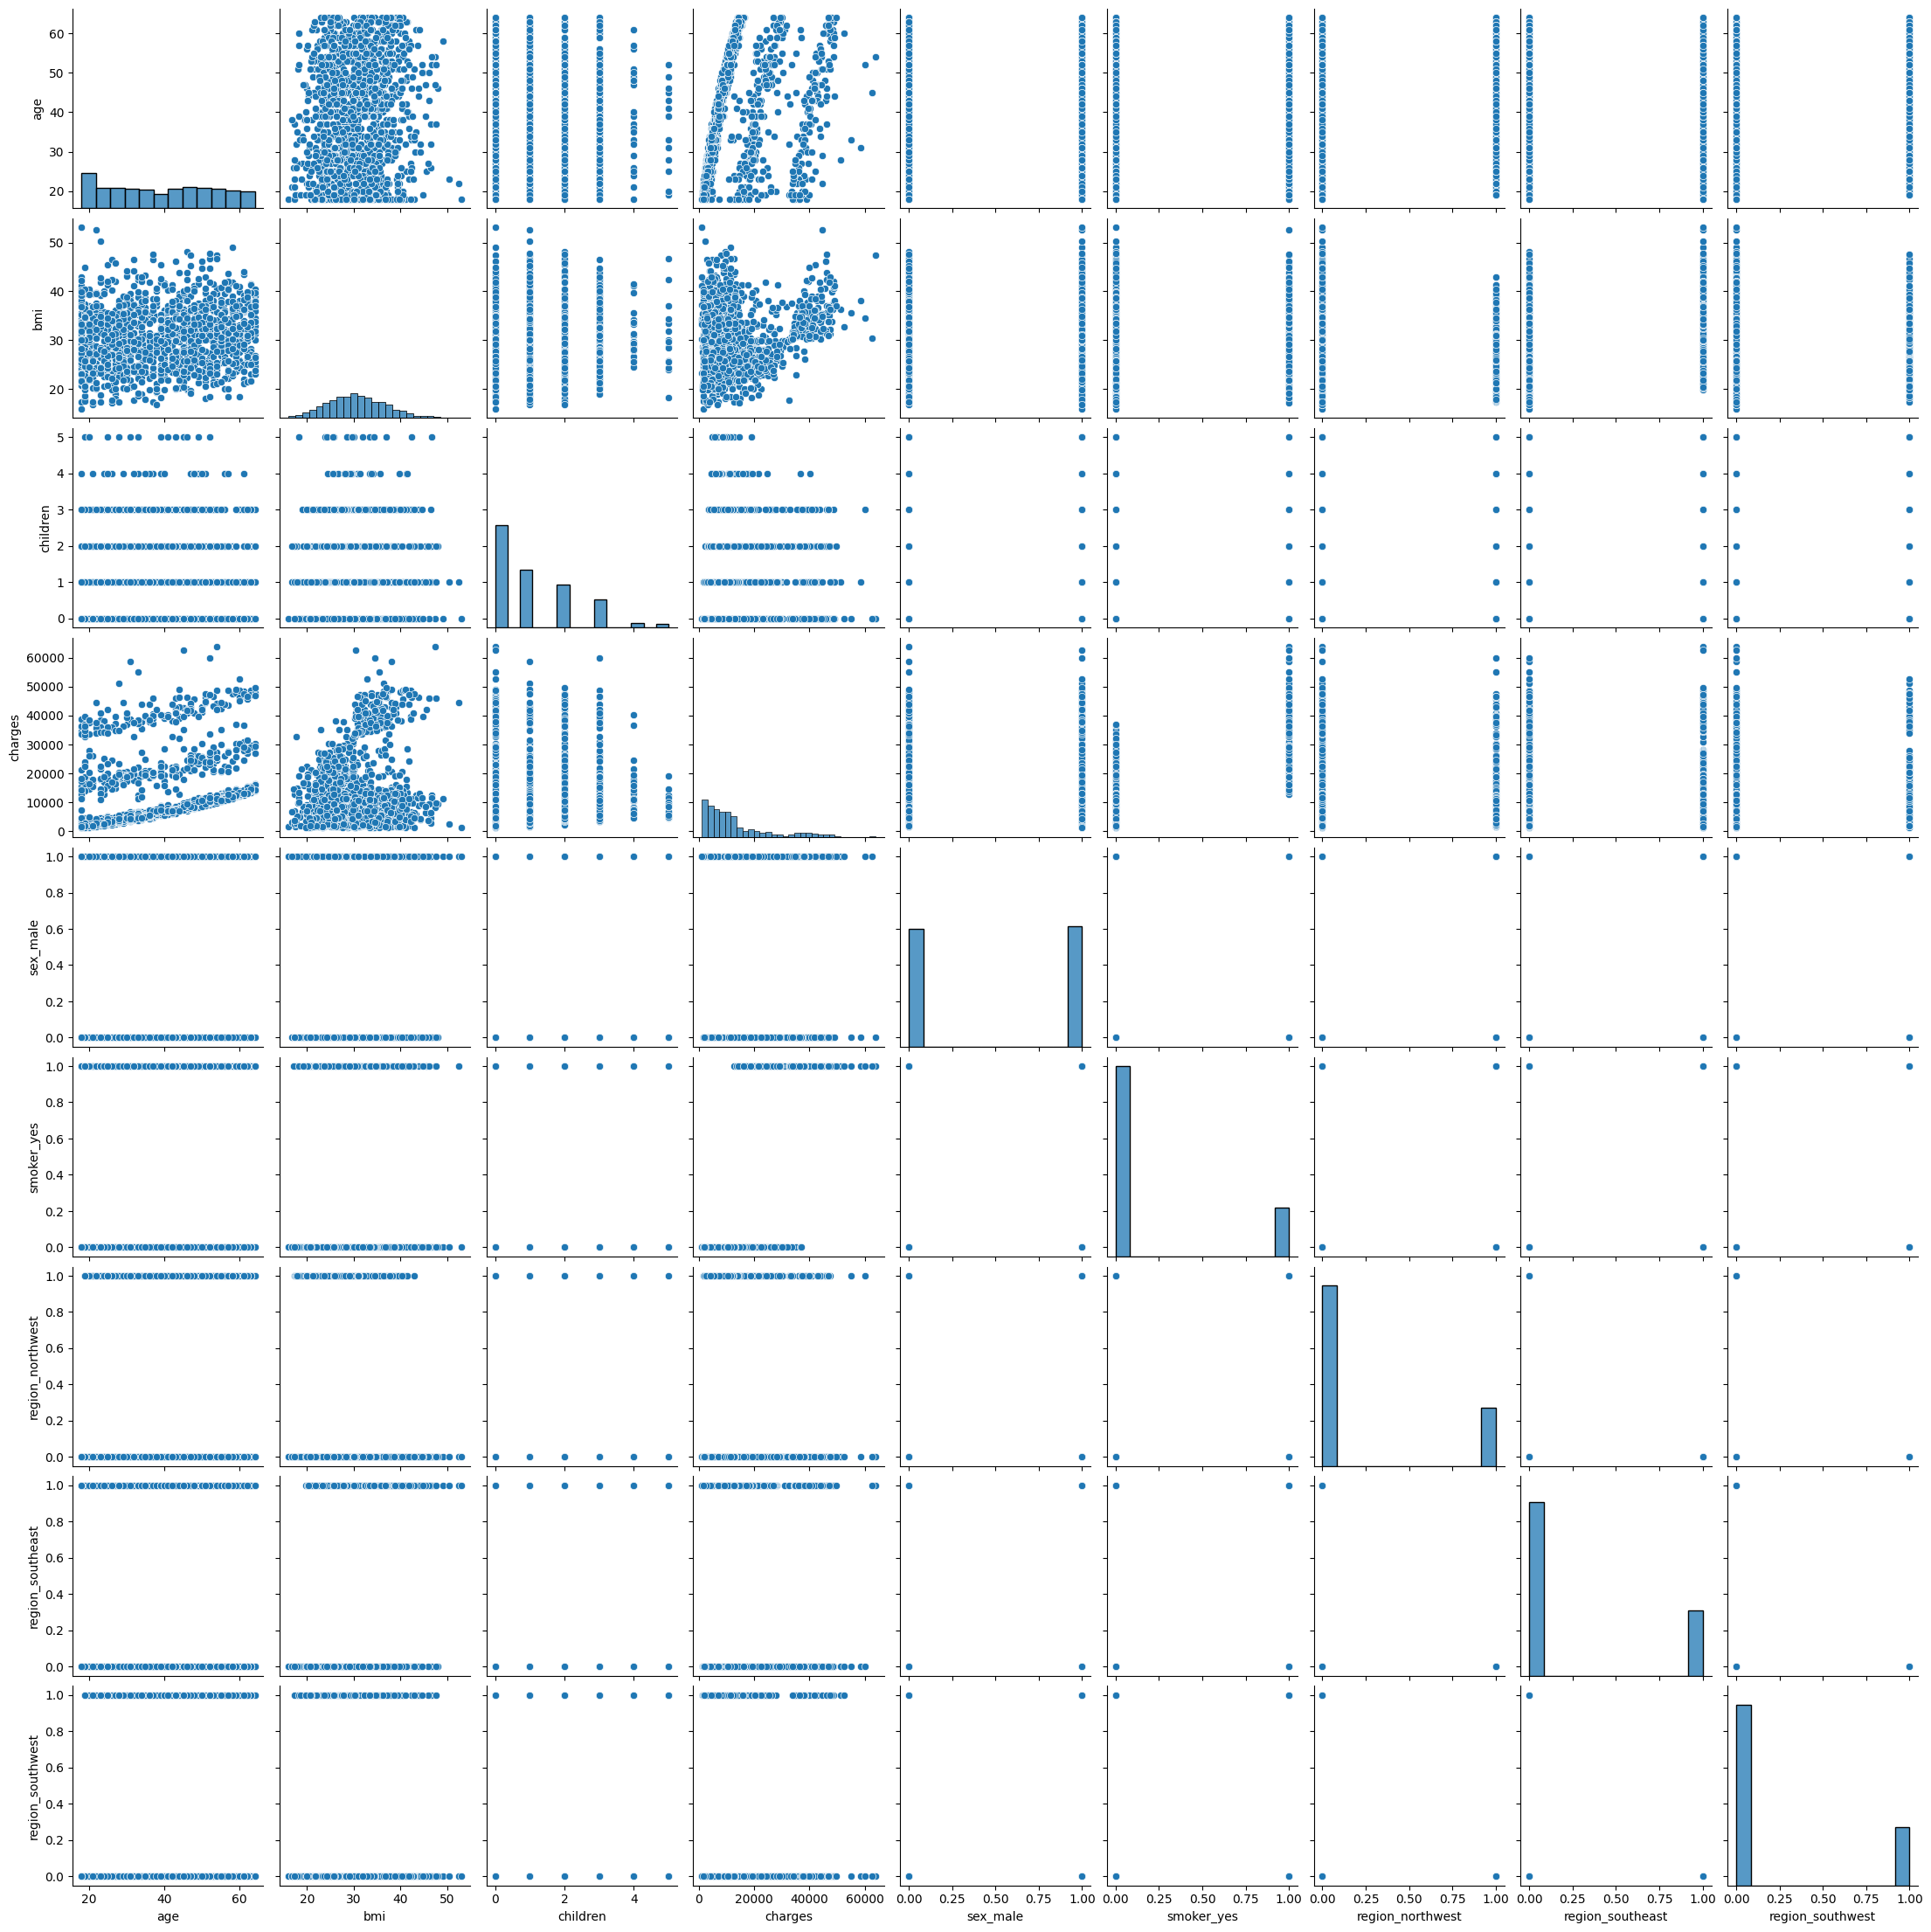

In [ ]:
# Data Visualization (Feature vs Feature)
sns.pairplot(data_encoded)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

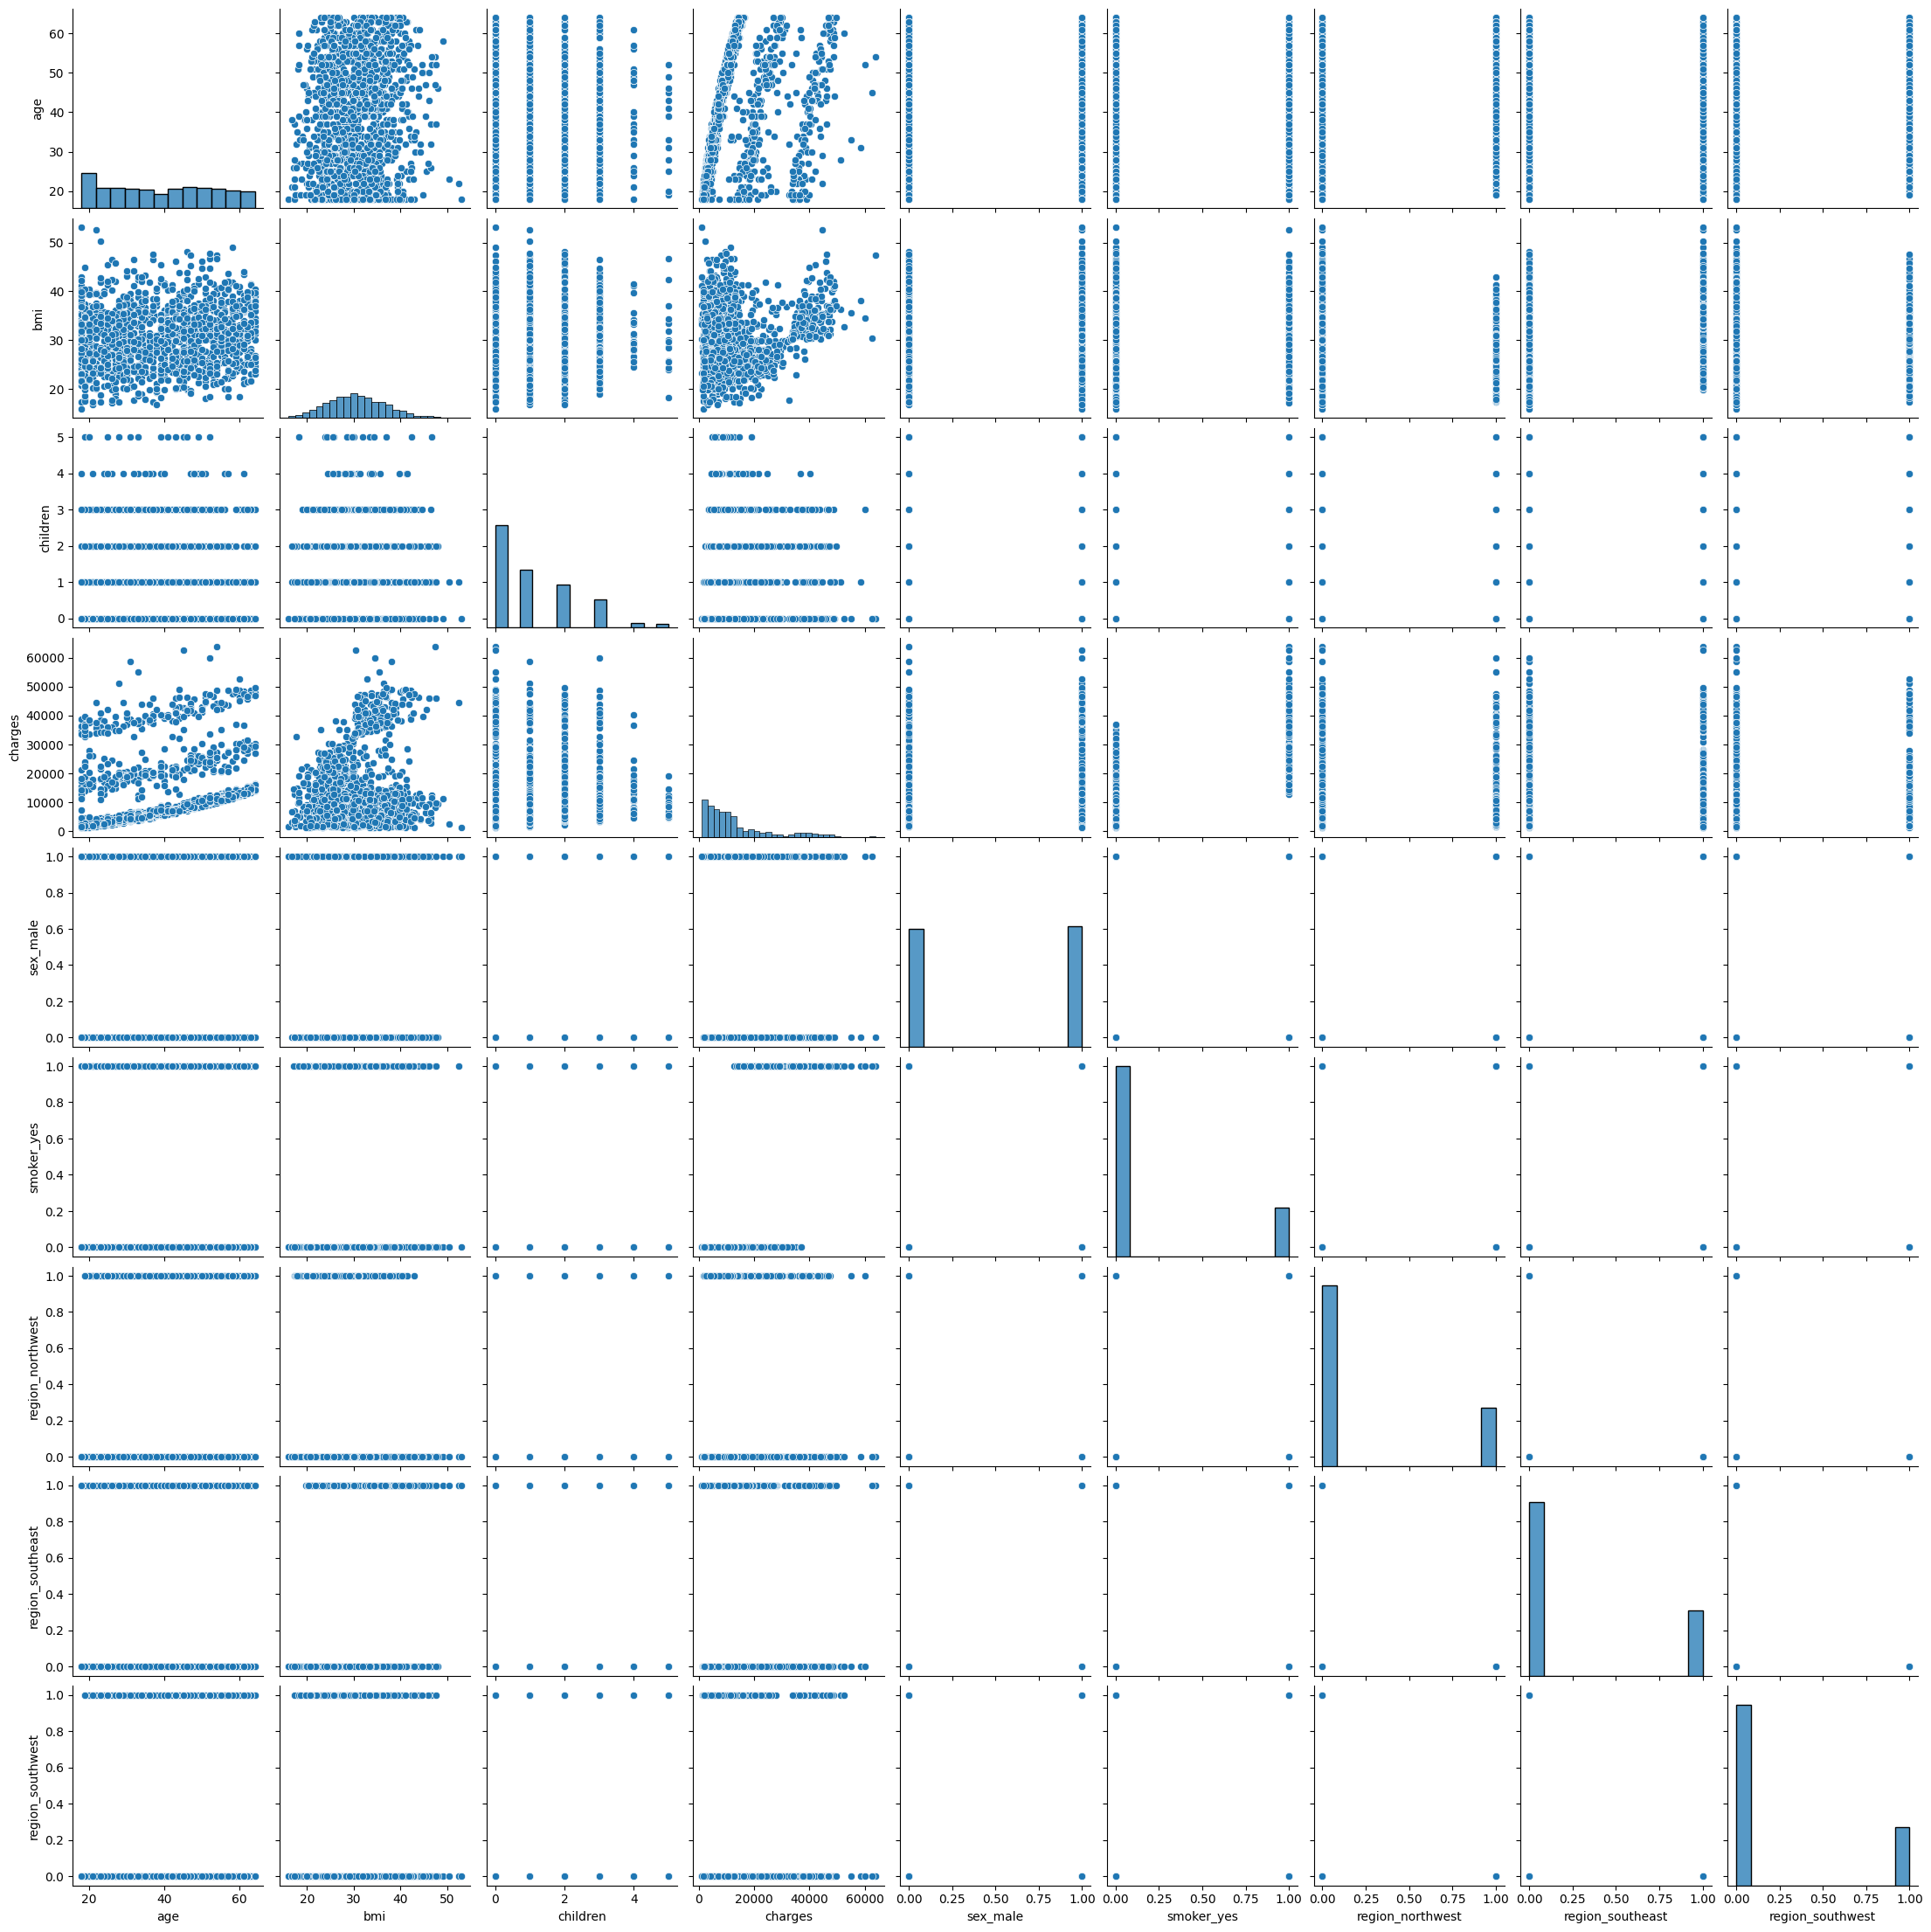

In [ ]:
# Data Visualization (Feature vs Feature)
sns.pairplot(data_encoded)
plt.show()